In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from pytrends.request import TrendReq
import seaborn as sns
sns.set_style('darkgrid')

## Corona Cases

#### Importing a csv file with all corona cases worldwide up to now and create a dataframe 
#### Filtering the table for data in Germany and clean the table

In [9]:
corona = pd.read_csv("Corona_Cases/owid-covid-data.csv")
corona = df.where(df['location'] == 'Germany').dropna(how='all').reset_index()
corona.head()

,level_0,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,11800,DEU,Europe,Germany,2019-12-31,NaN,0.0,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
1,1,11801,DEU,Europe,Germany,2020-01-01,NaN,0.0,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
2,2,11802,DEU,Europe,Germany,2020-01-02,NaN,0.0,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
3,3,11803,DEU,Europe,Germany,2020-01-03,NaN,0.0,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
4,4,11804,DEU,Europe,Germany,2020-01-04,NaN,0.0,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936


#### Filtering dataframe for columns containing daily new cases & new death cases

In [10]:
corona_filtered=corona[['date','new_cases','new_deaths']]
corona_filtered

,date,new_cases,new_deaths
0,2019-12-31,0.0,0.0
1,2020-01-01,0.0,0.0
2,2020-01-02,0.0,0.0
3,2020-01-03,0.0,0.0
4,2020-01-04,0.0,0.0
...,...,...,...
286,2020-10-12,2467.0,6.0
287,2020-10-13,4122.0,13.0
288,2020-10-14,5132.0,43.0
289,2020-10-15,6638.0,33.0


#### Filtering for the data from 01.01.2020 - 30.09.2020

In [11]:
corona_filtered_loc = corona_filtered.loc[1:274, ["date","new_cases", "new_deaths"]]
corona_filtered_loc


,date,new_cases,new_deaths
1,2020-01-01,0.0,0.0
2,2020-01-02,0.0,0.0
3,2020-01-03,0.0,0.0
4,2020-01-04,0.0,0.0
5,2020-01-05,0.0,0.0
...,...,...,...
270,2020-09-26,2507.0,9.0
271,2020-09-27,1410.0,5.0
272,2020-09-28,1192.0,3.0
273,2020-09-29,2089.0,11.0


In [12]:
corona_filtered_loc.date = pd.to_datetime(df_new_loc.date)
corona_filtered_loc

,date,new_cases,new_deaths
1,2020-01-01,0.0,0.0
2,2020-01-02,0.0,0.0
3,2020-01-03,0.0,0.0
4,2020-01-04,0.0,0.0
5,2020-01-05,0.0,0.0
...,...,...,...
270,2020-09-26,2507.0,9.0
271,2020-09-27,1410.0,5.0
272,2020-09-28,1192.0,3.0
273,2020-09-29,2089.0,11.0


#### Plotting the daily new cases and daily new death cases 

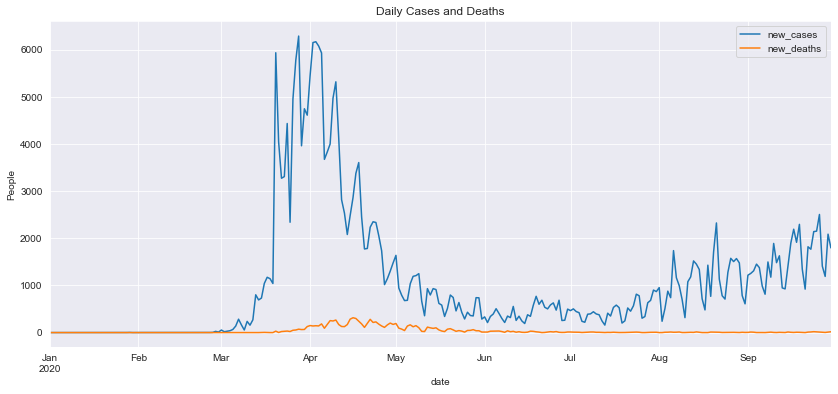

In [15]:
corona_filtered_loc.plot(x ='date', y=['new_cases','new_deaths'], figsize=(14,6))
plt.title('Daily Cases and Deaths')
plt.ylabel('People')
plt.show()

## Google Trends: Corona related Search Terms

#### Use the Google trends API and define the arguments we need to get the data

In [22]:
pytrends = TrendReq(hl='en-US', tz=360+7*60)
search_term = ["corona","covid","coronavirus","covid 19" ]

In [23]:
pytrends.build_payload(kw_list=search_term, timeframe='2020-01-01 2020-09-30', cat=0, geo='DE')

#### Get the related search terms for self defined corona related keywords

In [26]:
related_queries_df = pd.DataFrame(list(pytrends.related_queries().values())[0]['top'])
related_queries_list = list(related_queries_df["query"])
print(related_queries_list)

['deutschland corona', 'corona aktuell', 'zahlen corona', 'corona virus', 'news corona', 'bayern corona', 'nrw corona', 'corona fälle', 'rki corona', 'corona usa', 'berlin corona', 'corona italien', 'corona karte', 'fallzahlen corona', 'corona test', 'corona symptome', 'corona niedersachsen', 'corona live', 'corona hamburg', 'corona sachsen', 'corona hessen', 'corona infizierte', 'sachsen corona', 'corona heute', 'corona baden württemberg']


#### Create a final list of keywords for which we want to get the daily search trend value

In [27]:
all_search_terms_list = search_term + related_queries_list
print (all_search_terms_list)

['corona', 'covid', 'coronavirus', 'covid 19', 'deutschland corona', 'corona aktuell', 'zahlen corona', 'corona virus', 'news corona', 'bayern corona', 'nrw corona', 'corona fälle', 'rki corona', 'corona usa', 'berlin corona', 'corona italien', 'corona karte', 'fallzahlen corona', 'corona test', 'corona symptome', 'corona niedersachsen', 'corona live', 'corona hamburg', 'corona sachsen', 'corona hessen', 'corona infizierte', 'sachsen corona', 'corona heute', 'corona baden württemberg']


#### Defining two timeframes as Google Trend Api does not provide daily data when thime frame is longer than six month

In [28]:
timeframe_first_half = '2020-01-01 2020-06-30'
timeframe_second_half = '2020-07-01 2020-09-30'

##### Creating a formula to get the daily numbers for any defined search term 

In [29]:
data_all = []
for i in range(0, (len(all_search_terms_list))):
    pytrends.build_payload(kw_list= [all_search_terms_list[i]],timeframe= timeframe_first_half, cat=0, geo='DE')
    data = pytrends.interest_over_time()
    pytrends.build_payload(kw_list= [all_search_terms_list[i]],timeframe= timeframe_second_half, cat=0, geo='DE')
    data_next = pytrends.interest_over_time()
    data = pd.concat([data, data_next])
    data = data.drop(labels=['isPartial'],axis='columns')
    data = data.reset_index()
    data = data.rename(columns={"corona":all_search_terms_list[i]})
    data_all.append(data)

In [30]:
data_all

[          date  corona
 0   2020-01-01       0
 1   2020-01-02       0
 2   2020-01-03       0
 3   2020-01-04       0
 4   2020-01-05       0
 ..         ...     ...
 269 2020-09-26      72
 270 2020-09-27      69
 271 2020-09-28      81
 272 2020-09-29      90
 273 2020-09-30      77
 
 [274 rows x 2 columns],
           date  covid
 0   2020-01-01      0
 1   2020-01-02      0
 2   2020-01-03      0
 3   2020-01-04      0
 4   2020-01-05      0
 ..         ...    ...
 269 2020-09-26     74
 270 2020-09-27     64
 271 2020-09-28     85
 272 2020-09-29     74
 273 2020-09-30     76
 
 [274 rows x 2 columns],
           date  coronavirus
 0   2020-01-01            0
 1   2020-01-02            0
 2   2020-01-03            0
 3   2020-01-04            0
 4   2020-01-05            0
 ..         ...          ...
 269 2020-09-26           19
 270 2020-09-27           17
 271 2020-09-28           18
 272 2020-09-29           20
 273 2020-09-30           15
 
 [274 rows x 2 columns],
       

#### Creating a dataframe with all data next to each other

In [31]:
df = reduce(lambda df1,df2: pd.merge(df1,df2,on='date'), data_all)
df

,date,corona,covid,coronavirus,covid 19,deutschland corona,corona aktuell,zahlen corona,corona virus,news corona,...,corona symptome,corona niedersachsen,corona live,corona hamburg,corona sachsen,corona hessen,corona infizierte,sachsen corona,corona heute,corona baden württemberg
0,2020-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2020-09-26,72,74,19,70,75,74,82,51,39,...,62,44,36,72,62,34,69,62,61,64
270,2020-09-27,69,64,17,60,78,72,70,39,37,...,72,53,32,69,46,35,55,46,48,61
271,2020-09-28,81,85,18,78,89,82,88,53,47,...,73,48,29,67,70,40,50,70,50,59
272,2020-09-29,90,74,20,79,100,100,100,89,58,...,79,68,51,68,79,63,72,79,100,100


#### Calculate a mean of all relevant search terms on a daily basis to get the importance of corona related topics in the google trends per day

In [32]:
df["Mean"]=df.drop('date', axis=1).mean(axis=1)
df

,date,corona,covid,coronavirus,covid 19,deutschland corona,corona aktuell,zahlen corona,corona virus,news corona,...,corona niedersachsen,corona live,corona hamburg,corona sachsen,corona hessen,corona infizierte,sachsen corona,corona heute,corona baden württemberg,Mean
0,2020-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,2020-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,2020-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,2020-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,2020-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2020-09-26,72,74,19,70,75,74,82,51,39,...,44,36,72,62,34,69,62,61,64,57.965517
270,2020-09-27,69,64,17,60,78,72,70,39,37,...,53,32,69,46,35,55,46,48,61,52.344828
271,2020-09-28,81,85,18,78,89,82,88,53,47,...,48,29,67,70,40,50,70,50,59,59.965517
272,2020-09-29,90,74,20,79,100,100,100,89,58,...,68,51,68,79,63,72,79,100,100,72.517241


##### Round the means

In [33]:
df.Mean = df.Mean.round()
df

,date,corona,covid,coronavirus,covid 19,deutschland corona,corona aktuell,zahlen corona,corona virus,news corona,...,corona niedersachsen,corona live,corona hamburg,corona sachsen,corona hessen,corona infizierte,sachsen corona,corona heute,corona baden württemberg,Mean
0,2020-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,2020-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,2020-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,2020-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,2020-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2020-09-26,72,74,19,70,75,74,82,51,39,...,44,36,72,62,34,69,62,61,64,58.0
270,2020-09-27,69,64,17,60,78,72,70,39,37,...,53,32,69,46,35,55,46,48,61,52.0
271,2020-09-28,81,85,18,78,89,82,88,53,47,...,48,29,67,70,40,50,70,50,59,60.0
272,2020-09-29,90,74,20,79,100,100,100,89,58,...,68,51,68,79,63,72,79,100,100,73.0


#### Plotting the dataframe

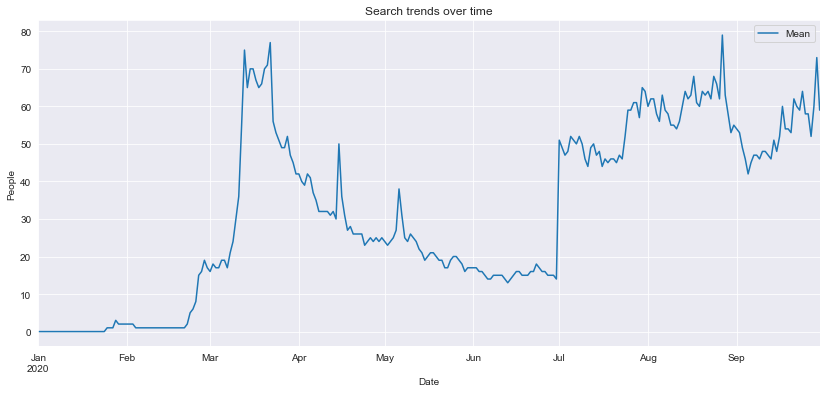

In [35]:
df.plot(x ='date', y='Mean', figsize=(14,6))
plt.title('Search trends over time')
plt.ylabel('People')
plt.xlabel ("Date")
plt.show()

In [38]:
trends_cases = corona_filtered_loc.merge(df, left_on='date', right_on='date')
trends_cases

,date,new_cases,new_deaths,corona,covid,coronavirus,covid 19,deutschland corona,corona aktuell,zahlen corona,...,corona niedersachsen,corona live,corona hamburg,corona sachsen,corona hessen,corona infizierte,sachsen corona,corona heute,corona baden württemberg,Mean
0,2020-01-01,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,2020-01-02,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,2020-01-03,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,2020-01-04,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,2020-01-05,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2020-09-26,2507.0,9.0,72,74,19,70,75,74,82,...,44,36,72,62,34,69,62,61,64,58.0
270,2020-09-27,1410.0,5.0,69,64,17,60,78,72,70,...,53,32,69,46,35,55,46,48,61,52.0
271,2020-09-28,1192.0,3.0,81,85,18,78,89,82,88,...,48,29,67,70,40,50,70,50,59,60.0
272,2020-09-29,2089.0,11.0,90,74,20,79,100,100,100,...,68,51,68,79,63,72,79,100,100,73.0


## Corona Cases & Trends

##### Create a dataframe containing corona cases per day as well as the relevance of corona related keywords in the google trends per day

In [39]:
trends_cases_filtered = trends_cases[['date','new_cases','new_deaths', 'Mean']]
trends_cases_filtered

,date,new_cases,new_deaths,Mean
0,2020-01-01,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,0.0
4,2020-01-05,0.0,0.0,0.0
...,...,...,...,...
269,2020-09-26,2507.0,9.0,58.0
270,2020-09-27,1410.0,5.0,52.0
271,2020-09-28,1192.0,3.0,60.0
272,2020-09-29,2089.0,11.0,73.0


In [43]:
trends_cases_filtered_indexed = trends_cases_filtered.set_index('date')
trends_cases_filtered_indexed

,new_cases,new_deaths,Mean
date,,,
2020-01-01,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0
...,...,...,...
2020-09-26,2507.0,9.0,58.0
2020-09-27,1410.0,5.0,52.0
2020-09-28,1192.0,3.0,60.0


#### Plotting the data on a normalized scale to see connection of data

In [91]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [92]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(trends_cases_filtered_indexed), columns=['new_cases', 'new_deaths', 'Mean'])
df_standard = pd.DataFrame(standard_scaler.fit_transform(trends_cases_filtered_indexed), columns=['new_cases', 'new_deaths', 'Mean'])

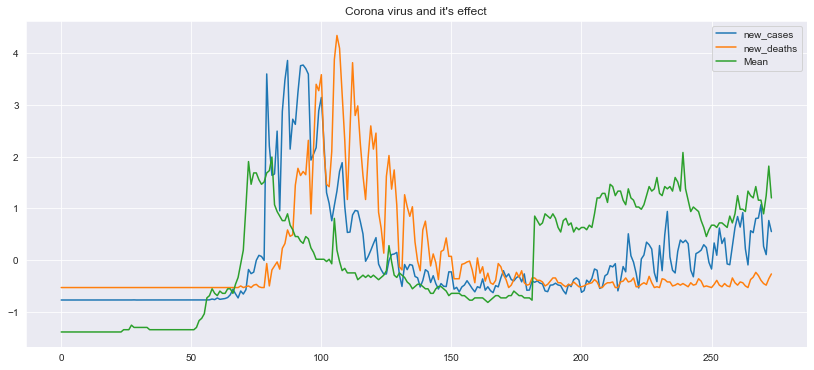

In [94]:
df_standard.plot(figsize=(14,6))
plt.title("Corona virus and it's effect")
plt.show()

#### Calculating the correlation between new corona cases per day, new deaths per day as well as the relevance of corona related keywords in the google trends per day

In [95]:
trends_cases_filtered_indexed.corr()

,new_cases,new_deaths,Mean
new_cases,1.000000,0.583291,0.427195
new_deaths,0.583291,1.000000,-0.009329
Mean,0.427195,-0.009329,1.000000


## Share Data

In [67]:
from bs4 import BeautifulSoup as bs
import requests
import re
import json
import pandas as pd
import os
import glob
from functools import reduce
from alpha_vantage.timeseries import TimeSeries

#### Merge all the individual share price file into one dataframe by date.

In [68]:
path = "DAX_Share/DAX_Share_Prices"
all_filenames = os.listdir(path)
all_filenames
#combine all files in the list
file_all = []
for file in all_filenames:
    filepath = path + "/" + file
    df = pd.read_csv(filepath)
    df = df[["date", "5. adjusted close"]]
    df_new = df.sort_values(by="date")
    df_new = df_new.rename(columns={"date":"Date", "5. adjusted close":"close_" + file})
    file_all.append(df_new)
file_all

share_merged = reduce(lambda df1,df2: pd.merge(df1,df2, how="left", on='Date'), file_all)
share_merged = share_merged.sort_values(by="Date")
share_merged

,Date,close_df_ADS,close_df_ALV,close_df_BAYN,close_df_DAX,close_df_DTE,close_df_HEI,close_df_LIN,close_df_MRK,close_df_MTX,close_df_SAP
0,2020-01-02,110.6761,85.0618,NaN,28.1798,125.0174,119.6146,207.9681,89.9381,57.2792,134.8236
1,2020-01-03,108.6098,82.6711,NaN,27.6755,125.3185,120.3036,202.5602,89.1662,56.5513,132.0347
2,2020-01-06,109.1018,81.3915,NaN,27.6903,125.2894,121.2622,201.7017,89.5473,55.8632,132.2515
3,2020-01-07,108.4819,81.3320,NaN,27.6409,124.8717,122.1808,202.1359,87.1630,55.5241,131.6799
4,2020-01-08,108.4425,81.4212,NaN,27.9425,124.8037,120.5232,204.6622,86.5767,55.9729,133.1187
...,...,...,...,...,...,...,...,...,...,...,...
184,2020-09-24,42.3200,69.3600,0.0,27.5000,112.9900,101.4800,234.5000,83.1500,48.1000,153.3400
185,2020-09-25,42.0000,69.1200,0.0,27.4500,114.7200,104.1700,232.7500,82.9300,49.2300,152.0600
186,2020-09-28,43.2600,72.0600,0.0,28.2300,114.8100,105.4400,237.0500,82.7600,51.1900,157.0800
187,2020-09-29,42.8200,72.8700,0.0,28.3006,114.4000,104.4400,236.4300,81.9000,51.1600,156.5700


#### We dropped one column named df_BAYN due to no enough values

In [69]:
share_merged = share_merged.drop("close_df_BAYN", axis=1)
share_merged

,Date,close_df_ADS,close_df_ALV,close_df_DAX,close_df_DTE,close_df_HEI,close_df_LIN,close_df_MRK,close_df_MTX,close_df_SAP
0,2020-01-02,110.6761,85.0618,28.1798,125.0174,119.6146,207.9681,89.9381,57.2792,134.8236
1,2020-01-03,108.6098,82.6711,27.6755,125.3185,120.3036,202.5602,89.1662,56.5513,132.0347
2,2020-01-06,109.1018,81.3915,27.6903,125.2894,121.2622,201.7017,89.5473,55.8632,132.2515
3,2020-01-07,108.4819,81.3320,27.6409,124.8717,122.1808,202.1359,87.1630,55.5241,131.6799
4,2020-01-08,108.4425,81.4212,27.9425,124.8037,120.5232,204.6622,86.5767,55.9729,133.1187
...,...,...,...,...,...,...,...,...,...,...
184,2020-09-24,42.3200,69.3600,27.5000,112.9900,101.4800,234.5000,83.1500,48.1000,153.3400
185,2020-09-25,42.0000,69.1200,27.4500,114.7200,104.1700,232.7500,82.9300,49.2300,152.0600
186,2020-09-28,43.2600,72.0600,28.2300,114.8100,105.4400,237.0500,82.7600,51.1900,157.0800
187,2020-09-29,42.8200,72.8700,28.3006,114.4000,104.4400,236.4300,81.9000,51.1600,156.5700


In [75]:
share_filtered=share_merged[['Date','close_df_DAX']]
share_filtered

,Date,close_df_DAX
0,2020-01-02,28.1798
1,2020-01-03,27.6755
2,2020-01-06,27.6903
3,2020-01-07,27.6409
4,2020-01-08,27.9425
...,...,...
184,2020-09-24,27.5000
185,2020-09-25,27.4500
186,2020-09-28,28.2300
187,2020-09-29,28.3006


In [76]:
share_filtered_loc = share_filtered.loc[0:189, ['Date','close_df_DAX']]
share_filtered_loc


,Date,close_df_DAX
0,2020-01-02,28.1798
1,2020-01-03,27.6755
2,2020-01-06,27.6903
3,2020-01-07,27.6409
4,2020-01-08,27.9425
...,...,...
184,2020-09-24,27.5000
185,2020-09-25,27.4500
186,2020-09-28,28.2300
187,2020-09-29,28.3006


In [77]:
share_filtered_loc.Date = pd.to_datetime(share_filtered_loc.Date)
share_filtered_loc

,Date,close_df_DAX
0,2020-01-02,28.1798
1,2020-01-03,27.6755
2,2020-01-06,27.6903
3,2020-01-07,27.6409
4,2020-01-08,27.9425
...,...,...
184,2020-09-24,27.5000
185,2020-09-25,27.4500
186,2020-09-28,28.2300
187,2020-09-29,28.3006


In [80]:
cases_trends_shares = trends_cases_filtered.merge(share_filtered_loc, left_on='date', right_on='Date').drop('Date', axis=1)
cases_trends_shares

,date,new_cases,new_deaths,Mean,close_df_DAX
0,2020-01-02,0.0,0.0,0.0,28.1798
1,2020-01-03,0.0,0.0,0.0,27.6755
2,2020-01-06,0.0,0.0,0.0,27.6903
3,2020-01-07,0.0,0.0,0.0,27.6409
4,2020-01-08,0.0,0.0,0.0,27.9425
...,...,...,...,...,...
184,2020-09-24,2143.0,19.0,64.0,27.5000
185,2020-09-25,2153.0,15.0,58.0,27.4500
186,2020-09-28,1192.0,3.0,60.0,28.2300
187,2020-09-29,2089.0,11.0,73.0,28.3006


In [84]:
cases_trends_shares_indexed = cases_trends_shares.set_index('date')
cases_trends_shares_indexed

,new_cases,new_deaths,Mean,close_df_DAX
date,,,,
2020-01-02,0.0,0.0,0.0,28.1798
2020-01-03,0.0,0.0,0.0,27.6755
2020-01-06,0.0,0.0,0.0,27.6903
2020-01-07,0.0,0.0,0.0,27.6409
2020-01-08,0.0,0.0,0.0,27.9425
...,...,...,...,...
2020-09-24,2143.0,19.0,64.0,27.5000
2020-09-25,2153.0,15.0,58.0,27.4500
2020-09-28,1192.0,3.0,60.0,28.2300


In [87]:
cases_trends_shares_indexed.corr()

,new_cases,new_deaths,Mean,close_df_DAX
new_cases,1.000000,0.538377,0.435731,-0.507737
new_deaths,0.538377,1.000000,-0.019937,-0.596232
Mean,0.435731,-0.019937,1.000000,-0.031439
close_df_DAX,-0.507737,-0.596232,-0.031439,1.000000


In [96]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
df_min_max_total = pd.DataFrame(min_max_scaler.fit_transform(cases_trends_shares_indexed), columns=['new_cases', 'new_deaths', 'Mean', 'close_df_DAX'])
df_standard_total = pd.DataFrame(standard_scaler.fit_transform(cases_trends_shares_indexed), columns=['new_cases', 'new_deaths', 'Mean', 'close_df_DAX'])

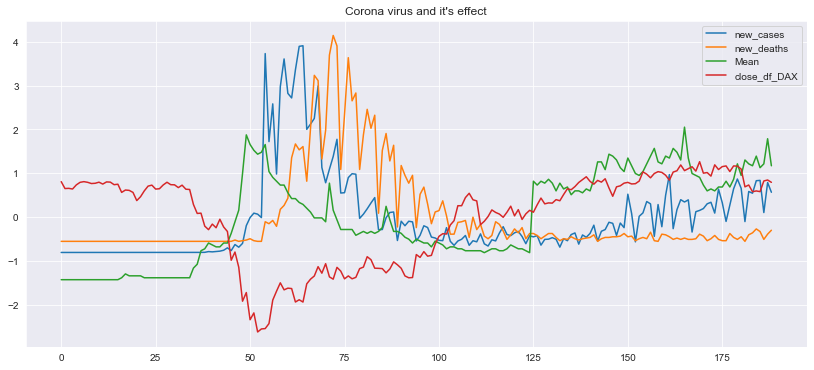

In [97]:
df_standard_total.plot(figsize=(14,6))
plt.title("Corona virus and it's effect")
plt.show()